# Price Recommendation for Online Sellers

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data reading

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Price Recommendation for Online Sellers/train.tsv', sep = '\t')
test = pd.read_csv('/content/drive/MyDrive/Price Recommendation for Online Sellers/test.tsv', sep='\t')

## Data Preprocessing

In [3]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1482535, 8)
Test data shape: (693359, 7)


In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [6]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


### Missing data

In [8]:
pd.isnull(train).sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [9]:
pd.isnull(test).sum()

test_id                   0
name                      0
item_condition_id         0
category_name          3058
brand_name           295525
shipping                  0
item_description          0
dtype: int64

In [10]:
train.brand_name.fillna(value = "NoBrand", inplace = True)
test.brand_name.fillna(value = "NoBrand", inplace = True)

train.category_name.fillna(value = "Other/Other/Other", inplace = True)
test.category_name.fillna(value = "Other/Other/Other", inplace = True)

train.item_description.fillna(value = "No description yet", inplace = True)
test.item_description.fillna(value = "No description yet", inplace = True)

In [11]:
train.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name        False
brand_name           False
price                False
shipping             False
item_description     False
dtype: bool

In [12]:
test.isnull().any()

test_id              False
name                 False
item_condition_id    False
category_name        False
brand_name           False
shipping             False
item_description     False
dtype: bool

###Category name

In [13]:
def split(txt):
    try :
        return txt.split("/")
    except :
        return ("Other", "Other", "Other")

In [14]:
train['general_category']=''
train['subcategory_1'] = ''
train['subcategory_2'] = ''

test['general_category']=''
test['subcategory_1'] = ''
test['subcategory_2'] = ''

In [15]:
train['general_category'],train['subcategory_1'],train['subcategory_2'] = \
zip(*train['category_name'].apply(lambda x: split(x)))

test['general_category'],test['subcategory_1'],test['subcategory_2'] = \
zip(*test['category_name'].apply(lambda x: split(x)))

In [16]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_category,subcategory_1,subcategory_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NoBrand,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NoBrand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NoBrand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


### Exploratory Data Analysis

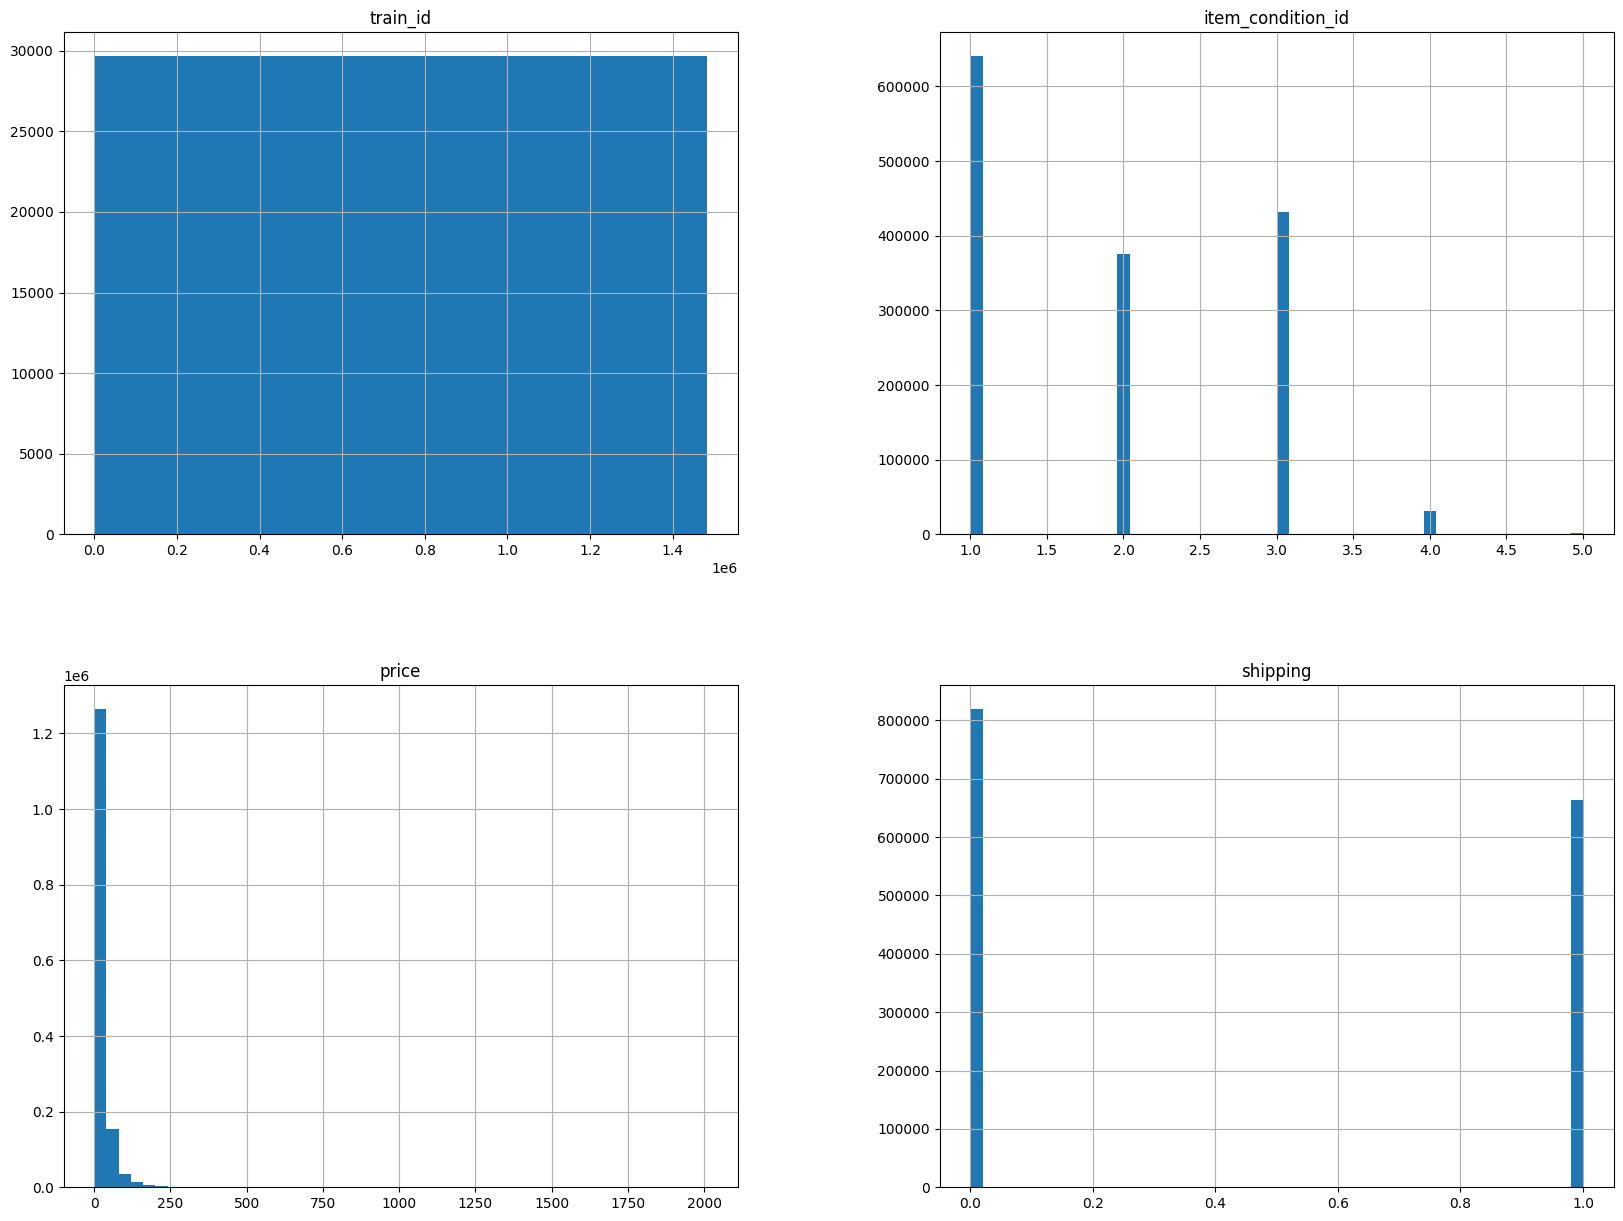

In [17]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
train['item_description'].value_counts()

No description yet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              82493
New                                                                                               

<Axes: >

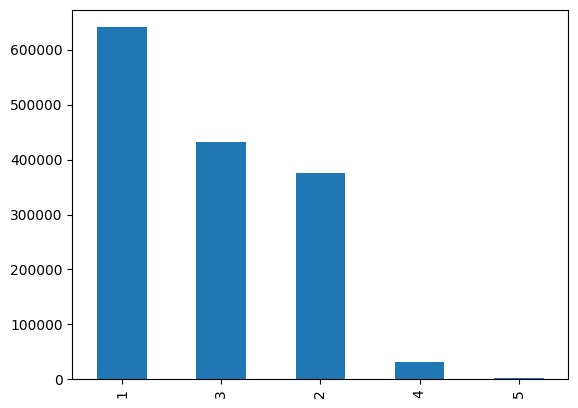

In [19]:
train['item_condition_id'].value_counts().plot(kind='bar')

it seems like **item_condition** is ordinal.we can say 1 is the best condition and 5 is the worst

In [20]:
train['brand_name'].value_counts()

NoBrand                 632682
PINK                     54088
Nike                     54043
Victoria's Secret        48036
LuLaRoe                  31024
                         ...  
The Learning Journey         1
Pampers Baby Fresh           1
Huggies One & Done           1
Classic Media                1
Kids Only                    1
Name: brand_name, Length: 4810, dtype: int64

<Axes: >

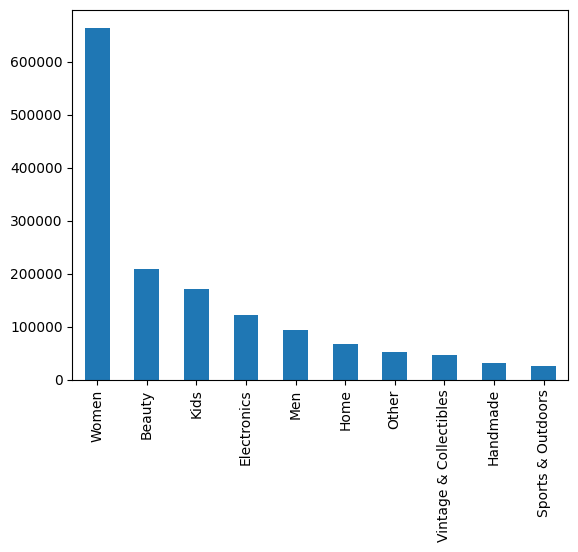

In [21]:
train['general_category'].value_counts().plot(kind='bar')

we notice that the most used products are women products

Athletic Apparel        134383
Makeup                  124624
Tops & Blouses          106960
Shoes                   100452
Jewelry                  61763
                         ...  
Candles                     64
Ceramics and Pottery        57
Dolls and Miniatures        49
Books and Zines             46
Quilts                      31
Name: subcategory_1, Length: 113, dtype: int64

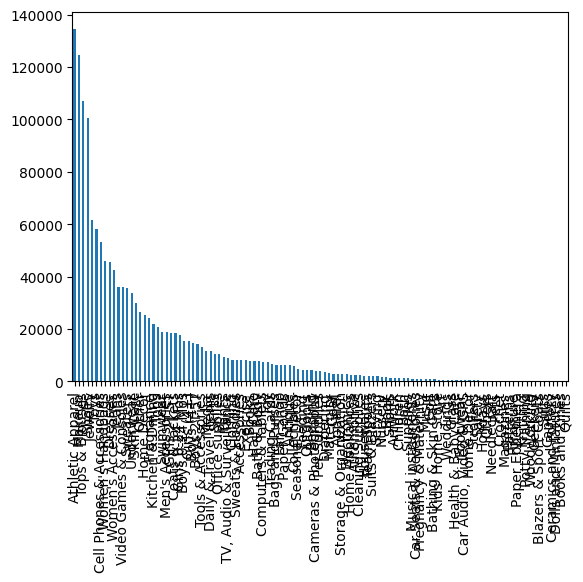

In [22]:
train['subcategory_1'].value_counts().plot(kind='bar')
train['subcategory_1'].value_counts()

Pants, Tights, Leggings    60177
Other                      56551
Face                       50171
T-Shirts                   46380
Shoes                      32168
                           ...  
St Patricks                    1
Garbage Disposals              1
Decorating                     1
Pet Food                       1
Ephemera                       1
Name: subcategory_2, Length: 870, dtype: int64

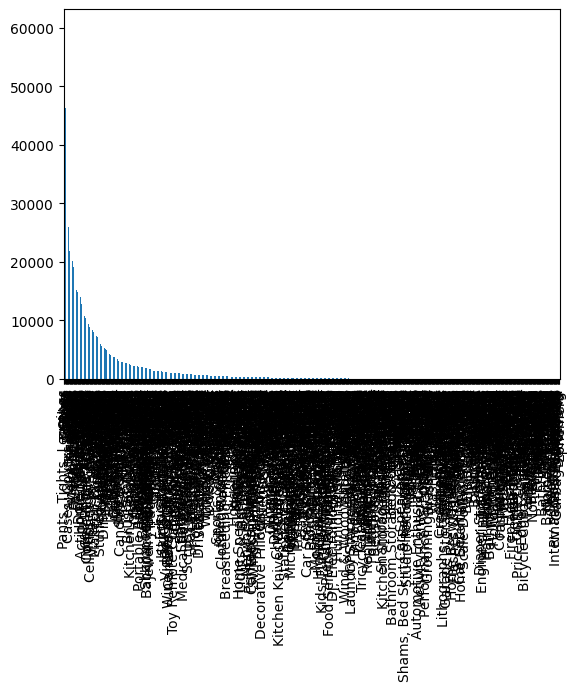

In [23]:
train['subcategory_2'].value_counts().plot(kind='bar')
train['subcategory_2'].value_counts()

We'll apply the log since the data is skewed

<Axes: >

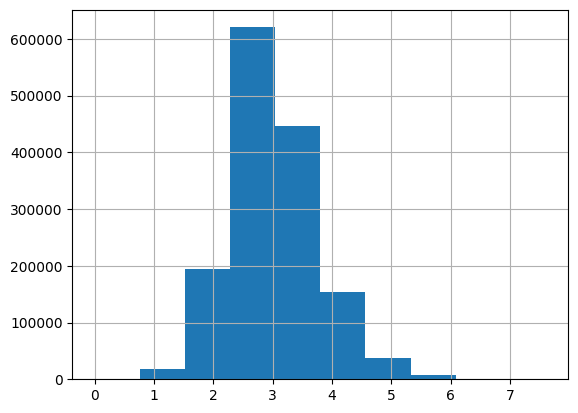

In [24]:
log_prices = np.log1p(train.price)
log_prices.hist()

We need to scale the data and apply One Hot Encoding OHE before proceeding

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_item_condition_id = scaler.fit_transform(train['item_condition_id'].values.reshape(-1,1))

In [26]:
from sklearn.preprocessing import LabelBinarizer

lb_brand_name = LabelBinarizer(sparse_output=True)
X_train_brand = lb_brand_name.fit_transform(train['brand_name'])

lb_shipping = LabelBinarizer(sparse_output=True)
X_train_shipping = lb_shipping.fit_transform(train['shipping'])

lb_cat_0 = LabelBinarizer(sparse_output=True)
X_train_general_category = lb_cat_0.fit_transform(train['general_category'])

lb_cat_1 = LabelBinarizer(sparse_output=True)
X_train_subcategory_1 = lb_cat_1.fit_transform(train['subcategory_1'])

lb_cat_2 = LabelBinarizer(sparse_output=True)
X_train_subcategory_2 = lb_cat_2.fit_transform(train['subcategory_2'])

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_desc = TfidfVectorizer(max_features=50000, ngram_range=(1, 1), stop_words='english', norm='l2',lowercase=True)
name_vectorizer = CountVectorizer(stop_words='english')

X_train_descp = tfidf_desc.fit_transform(train['item_description'])
X_train_name = name_vectorizer.fit_transform(train['name'])

In [28]:
from scipy.sparse import hstack

X_train = hstack((X_train_name, X_train_descp, X_train_brand, X_train_item_condition_id, X_train_shipping, X_train_general_category, X_train_subcategory_1, X_train_subcategory_2)).tocsr()

In [29]:
X_train

<1482535x161301 sparse matrix of type '<class 'numpy.float64'>'
	with 34484880 stored elements in Compressed Sparse Row format>

Now let's check the corrolation

In [30]:
corr_matrix = train.corr()
corr_matrix

<ipython-input-30-310b2495afb6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


,train_id,item_condition_id,price,shipping
train_id,1.000000,-0.000113,0.000478,0.000472
item_condition_id,-0.000113,1.000000,-0.000807,-0.191154
price,0.000478,-0.000807,1.000000,-0.097211
shipping,0.000472,-0.191154,-0.097211,1.000000


<Axes: >

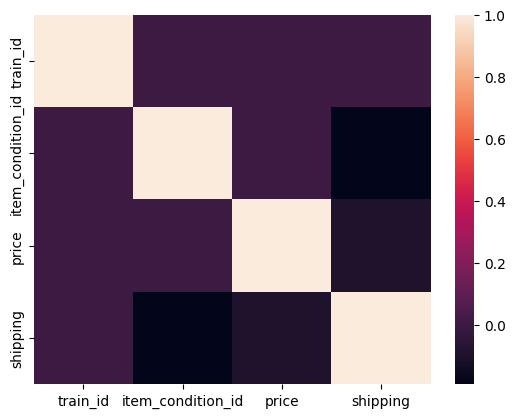

In [31]:
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

there is no strong corrolation that can be usefull

### Splitting dataset

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(train, train['general_category']):
    train_idx = train_index
    test_idx = test_index

In [33]:
test_data = X_train[test_idx]
log_test_prices = log_prices.iloc[test_idx]
train_data = X_train[train_idx]
log_train_prices = log_prices.iloc[train_idx]

##Modeling

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def performance(ytrue, ypredicted):
    print("MSE: ",np.sqrt(mean_squared_error(ytrue, ypredicted)))
    print("MAE: ", np.sqrt(mean_absolute_error(ytrue, ypredicted)))

In [37]:
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor

params = {
  'objective': 'regression', 'learning_rate': 0.5, 'max_depth': 8,
  'n_estimators': 600, 'num_leaves': 120
}

estimators = [ ('lr', Ridge(alpha=7)),
               ('svr', LGBMRegressor(**params, random_state=42)),
              ('lrr', Ridge(alpha=10)),
]

reg = StackingRegressor( estimators=estimators,
                         final_estimator=Ridge(alpha=7),
                         verbose=10, cv=3
)
reg.fit(train_data, log_train_prices)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 46.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 93.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 140.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 140.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2

StackingRegressor(cv=3,
                  estimators=[('lr', Ridge(alpha=7)),
                              ('svr',
                               LGBMRegressor(learning_rate=0.5, max_depth=8,
                                             n_estimators=600, num_leaves=120,
                                             objective='regression',
                                             random_state=42)),
                              ('lrr', Ridge(alpha=10))],
                  final_estimator=Ridge(alpha=7), verbose=10)

In [38]:
performance(log_test_prices, reg.predict(test_data))

MSE:  0.44818779033701367
MAE:  0.5779502468580525


In [39]:
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

In [40]:
rmsle = rmsle(np.expm1(log_test_prices), np.expm1(reg.predict(test_data)))

In [41]:
rmsle

0.44818779033701367